In [1]:
import xarray as xr 
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import copy
import warnings
from tqdm import tqdm
import cartopy.crs as ccrs
import scipy.io as sio
import cartopy.feature as cf
import matplotlib.ticker as mticker
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Inter'

ERROR 1: PROJ: proj_create_from_database: Open of /burg/glab/users/jf3423/.conda/envs/jianing/share/proj failed


/burg/glab/users/jf3423/.conda/envs/jianing/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/burg/glab/users/jf3423/.conda/envs/jianing/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/burg/glab/users/jf3423/.conda/envs/jianing/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/burg/glab/users/jf3423/.conda/envs/jianing/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecate

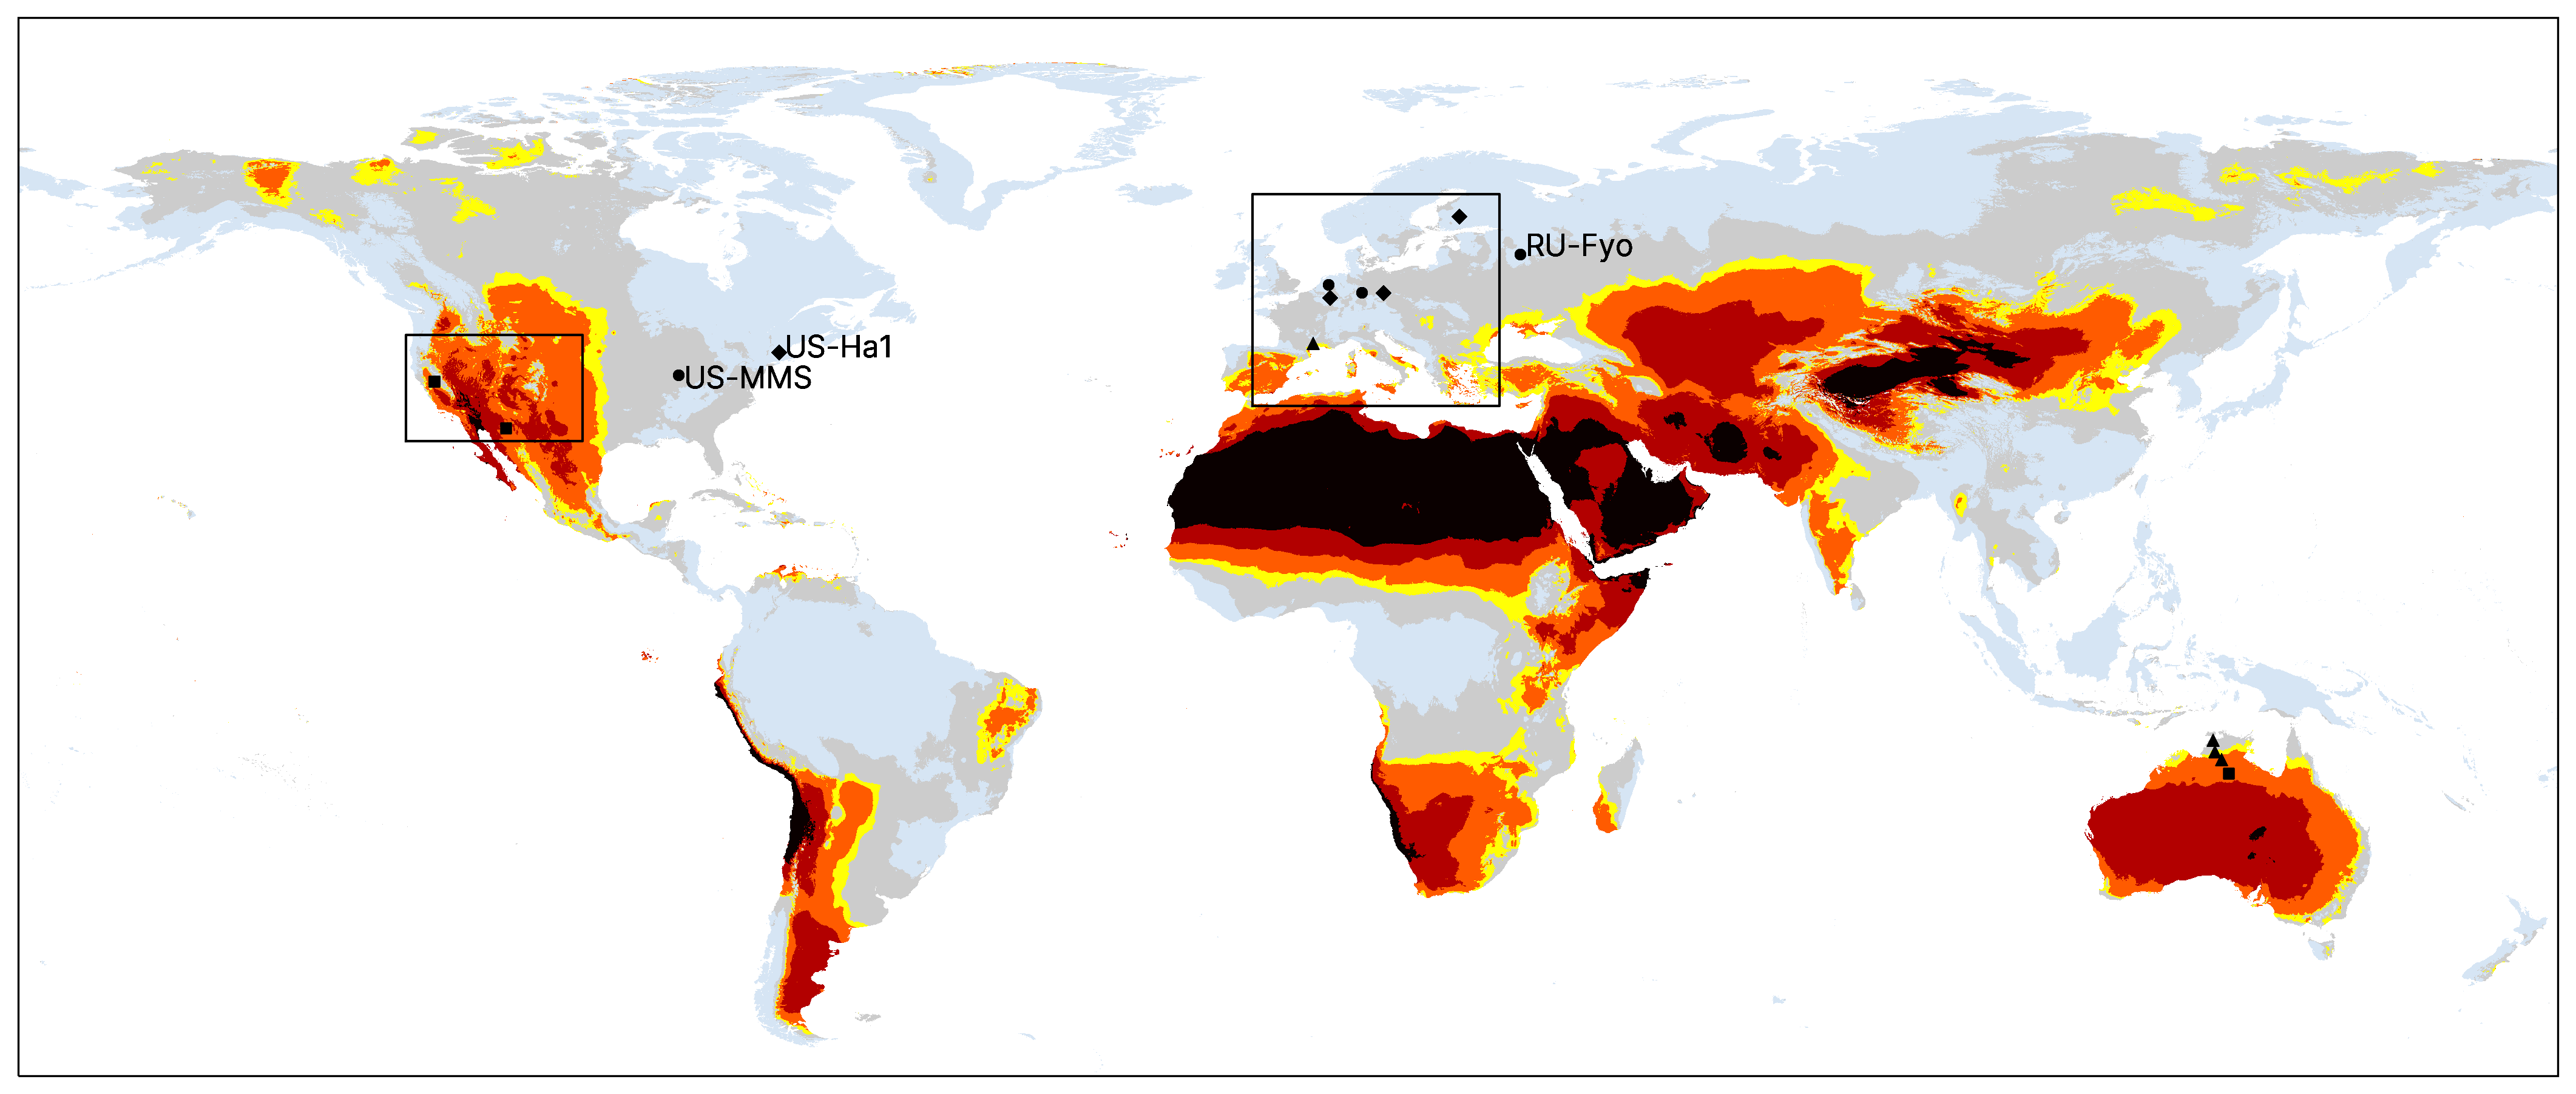

In [13]:
# the aridity index climatology map was derived from TerraClimate
# and used as a basemap, the dataset is not included in this repository

AI_DATA_PATH = "terraclimate_AI_avg.mat" 

df = pd.read_csv("../drivers/site_coords.csv")
AI_terra = sio.loadmat(AI_DATA_PATH)['AI_terra']
AI_terra = AI_terra[0:3600, :]

hyper_arid = (AI_terra < 0.05)
hyper_arid_n = np.zeros(AI_terra.shape)
hyper_arid_n[hyper_arid] = 0.0
hyper_arid_n[hyper_arid==False] = np.nan

arid = ((AI_terra >= 0.05) & (AI_terra < 0.2))
arid_n = np.zeros(AI_terra.shape)
arid_n[arid] = 1.0
arid_n[arid==False] = np.nan

semi_arid = ((AI_terra >= 0.2) & (AI_terra < 0.5))
semi_arid_n = np.zeros(AI_terra.shape)
semi_arid_n[semi_arid] = 2.0
semi_arid_n[semi_arid==False] = np.nan

dry_sub_humid = ((AI_terra >= 0.5) & (AI_terra < 0.65))
dry_sub_humid_n = np.zeros(AI_terra.shape)
dry_sub_humid_n[dry_sub_humid] = 3.0
dry_sub_humid_n[dry_sub_humid==False] = np.nan

humid = (AI_terra >= 0.65) & (AI_terra < 1.2)
humid_n = np.zeros(AI_terra.shape)
humid_n[humid] = 4.0
humid_n[humid==False] = np.nan

wet = AI_terra >= 1.2
wet_n = np.zeros(AI_terra.shape)
wet_n[wet] = 5.0
wet_n[wet==False] = np.nan

plt.figure(figsize=(18,9), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
extent=[-180, 180, -60, 90]

ax.plot([-5, 30, 30, -5, -5], [35, 35, 65, 65, 35],
         color='black', linewidth=1, 
         )

ax.plot([-125, -100, -100, -125, -125], [30, 30, 45, 45, 30],
         color='black', linewidth=1, 
         )


#ax.coastlines(resolution='50m', alpha=0.3, linewidth=1, color='black') # add map

def get_marker(cluster):
    if cluster == "cDD":
        return "s"
    elif cluster == "cGR":
        return "^"
    elif cluster == "cLS":
        return "o"
    elif cluster == "cNA":
        return "D"
    
for (idx, (SITE_ID, lon, lat)) in df[["SITE_ID", "lon", "lat"]].iterrows():
    for (idx, (SITE_ID, lon, lat, cluster)) in df[["SITE_ID", "lon", "lat", "cluster"]].iterrows():
            plt.plot(lon, lat,  markersize=3.5, marker=get_marker(cluster), color='black')
            box_europe = ((lon > -5) & (lon < 30) & (lat > 35) & (lat< 65))
            box_america = ((lon > -125) & (lon < -100) & (lat > 30) & (lat< 45))
            if not box_europe and not box_america and "AU" not in SITE_ID:
                if SITE_ID == "US-MMS":
                    plt.text(lon + 0.75, lat - 1.8, SITE_ID, fontsize=12)
                elif SITE_ID == "US-Ha1":
                    plt.text(lon + 0.75, lat - 0.7, SITE_ID, fontsize=12)
                elif SITE_ID == "AU-DaS":
                    plt.text(lon + 0.75, lat + 0.3, SITE_ID, fontsize=12)
                elif SITE_ID == "AU-Stp":
                    plt.text(lon + 0.75, lat - 0.4, SITE_ID, fontsize=12)
                else:
                    plt.text(lon + 0.75, lat - 0.2, SITE_ID, fontsize=12)
            
plt.imshow(hyper_arid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(arid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(semi_arid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(dry_sub_humid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(humid_n, cmap="gist_gray", interpolation="none", vmin=0, vmax=5, extent=extent)
plt.imshow(wet_n, cmap="Blues", interpolation="none", vmin=4, vmax=10, extent=extent)

ax.set_extent(extent, ccrs.PlateCarree())

gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='gray', alpha=0.5, linestyle="--")
#gl.ylocator = mticker.FixedLocator([80, 40, 0, -40])

gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = False

gl.xlabels_bottom = False


#plt.savefig("./figure/nee_less_than_0.4_with_ai.pdf")

/burg/glab/users/jf3423/.conda/envs/jianing/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/burg/glab/users/jf3423/.conda/envs/jianing/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


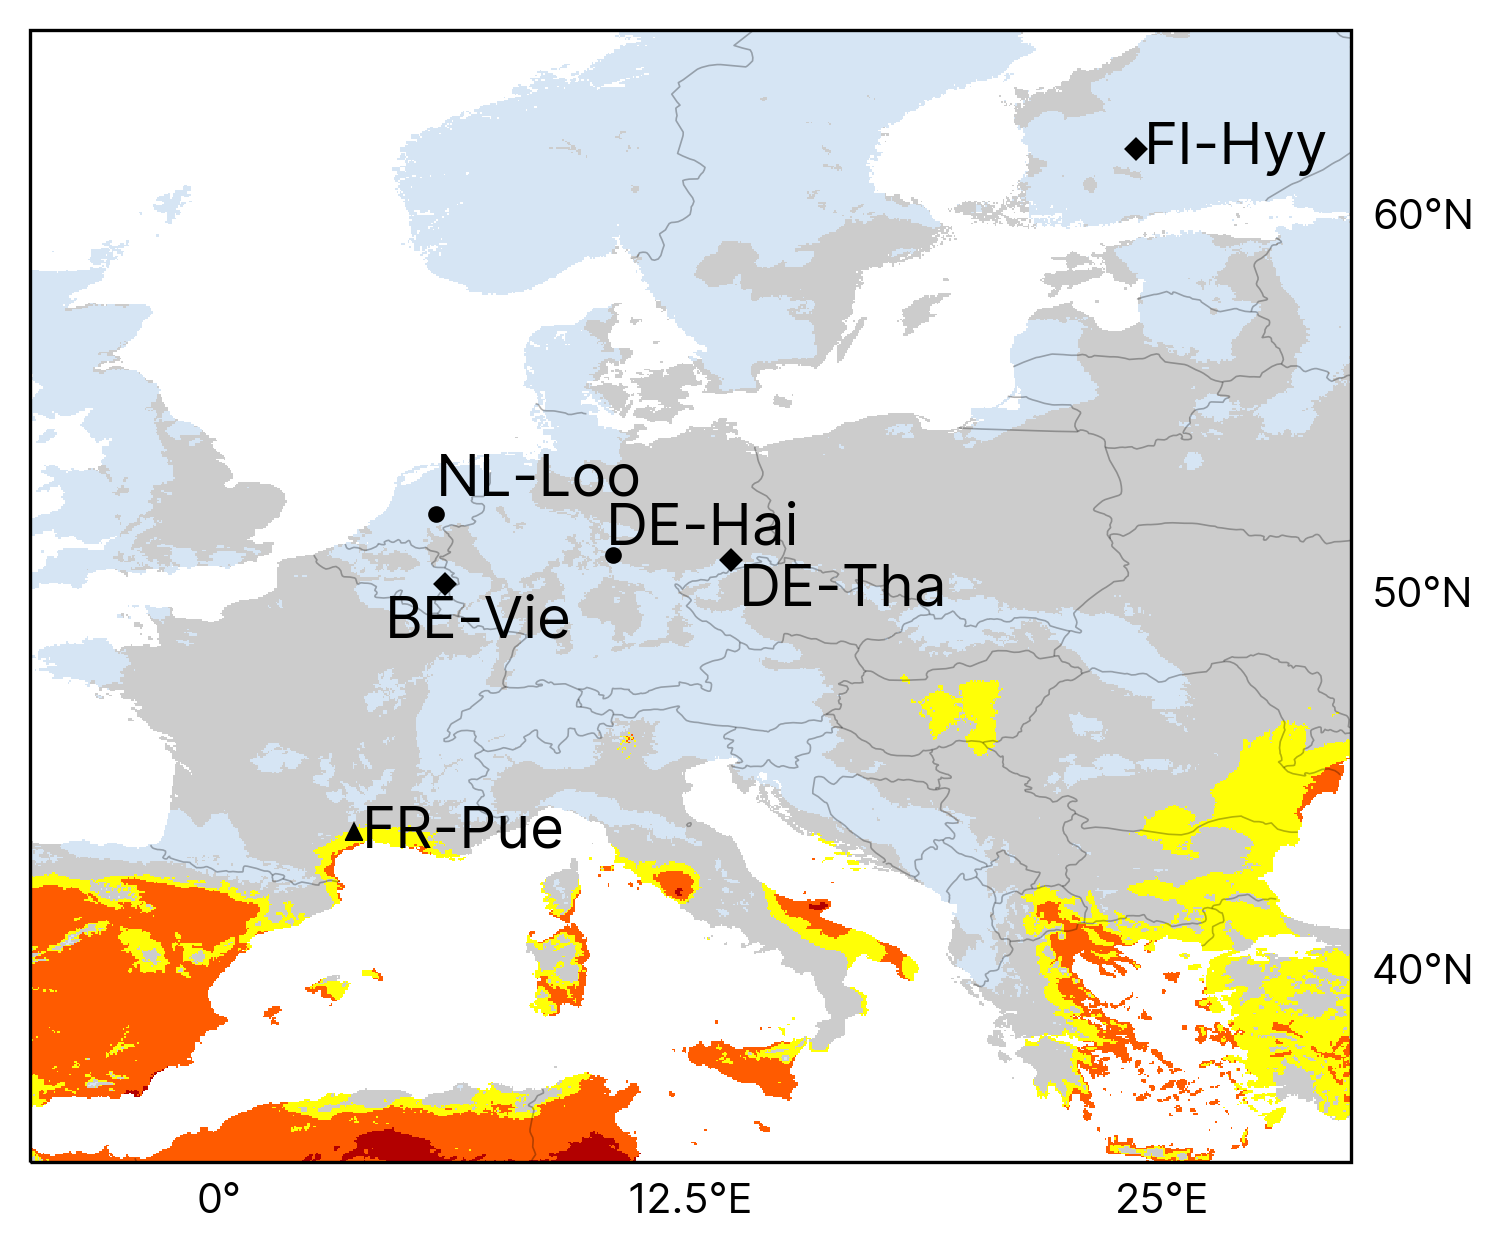

In [9]:
AI_terra = sio.loadmat(AI_DATA_PATH)['AI_terra']
AI_terra = AI_terra[600:1320, 4200:5040]

hyper_arid = (AI_terra < 0.05)
hyper_arid_n = np.zeros(AI_terra.shape)
hyper_arid_n[hyper_arid] = 0.0
hyper_arid_n[hyper_arid==False] = np.nan

arid = ((AI_terra >= 0.05) & (AI_terra < 0.2))
arid_n = np.zeros(AI_terra.shape)
arid_n[arid] = 1.0
arid_n[arid==False] = np.nan

semi_arid = ((AI_terra >= 0.2) & (AI_terra < 0.5))
semi_arid_n = np.zeros(AI_terra.shape)
semi_arid_n[semi_arid] = 2.0
semi_arid_n[semi_arid==False] = np.nan

dry_sub_humid = ((AI_terra >= 0.5) & (AI_terra < 0.65))
dry_sub_humid_n = np.zeros(AI_terra.shape)
dry_sub_humid_n[dry_sub_humid] = 3.0
dry_sub_humid_n[dry_sub_humid==False] = np.nan

humid = (AI_terra >= 0.65) & (AI_terra < 1.2)
humid_n = np.zeros(AI_terra.shape)
humid_n[humid] = 4.0
humid_n[humid==False] = np.nan

wet = AI_terra >= 1.2
wet_n = np.zeros(AI_terra.shape)
wet_n[wet] = 5.0
wet_n[wet==False] = np.nan

plt.figure(figsize=(10,5), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.BORDERS, linewidth=0.4, alpha=0.3)
extent=[-5, 30, 35, 65]

def get_marker(cluster):
    if cluster == "cDD":
        return "s"
    elif cluster == "cGR":
        return "^"
    elif cluster == "cLS":
        return "o"
    elif cluster == "cNA":
        return "D"

for (idx, (SITE_ID, lon, lat, cluster)) in df[["SITE_ID", "lon", "lat", "cluster"]].iterrows():
    if (lon > -5) & (lon < 30) & (lat > 35) & (lat< 65):
        plt.plot(lon, lat,  markersize=3, marker=get_marker(cluster), color='black')
        if SITE_ID == "DE-Hai":
            plt.text(lon - 0.2, lat + 0.3, SITE_ID, fontsize=14)
        elif SITE_ID == "DE-Tha":
            plt.text(lon + 0.2, lat - 1.2, SITE_ID, fontsize=14)
        elif SITE_ID == "NL-Loo":
            plt.text(lon, lat + 0.5, SITE_ID, fontsize=14)
        elif SITE_ID == "BE-Vie":
            plt.text(lon - 1.6, lat - 1.4, SITE_ID, fontsize=14)
        elif SITE_ID == "IT-Cpz":
            plt.text(lon + 0.2, lat - 0.9, SITE_ID, fontsize=14)
        elif SITE_ID == "BE-Vie":
            plt.text(lon + 0.2, lat - 0.6, SITE_ID, fontsize=14)
        else:
            plt.text(lon + 0.2, lat -0.4, SITE_ID, fontsize=14)
plt.imshow(hyper_arid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(arid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(semi_arid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(dry_sub_humid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(humid_n, cmap="gist_gray", interpolation="none", vmin=0, vmax=5, extent=extent)
plt.imshow(wet_n, cmap="Blues", interpolation="none", vmin=4, vmax=10, extent=extent)

gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='gray', alpha=0.5, linestyle="--")
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([0,12.5, 25])


gl.xlabels_top = False
gl.ylabels_left = False


# gl.ylocator = mticker.FixedLocator([32, 38, 44])

/burg/glab/users/jf3423/.conda/envs/jianing/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/burg/glab/users/jf3423/.conda/envs/jianing/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


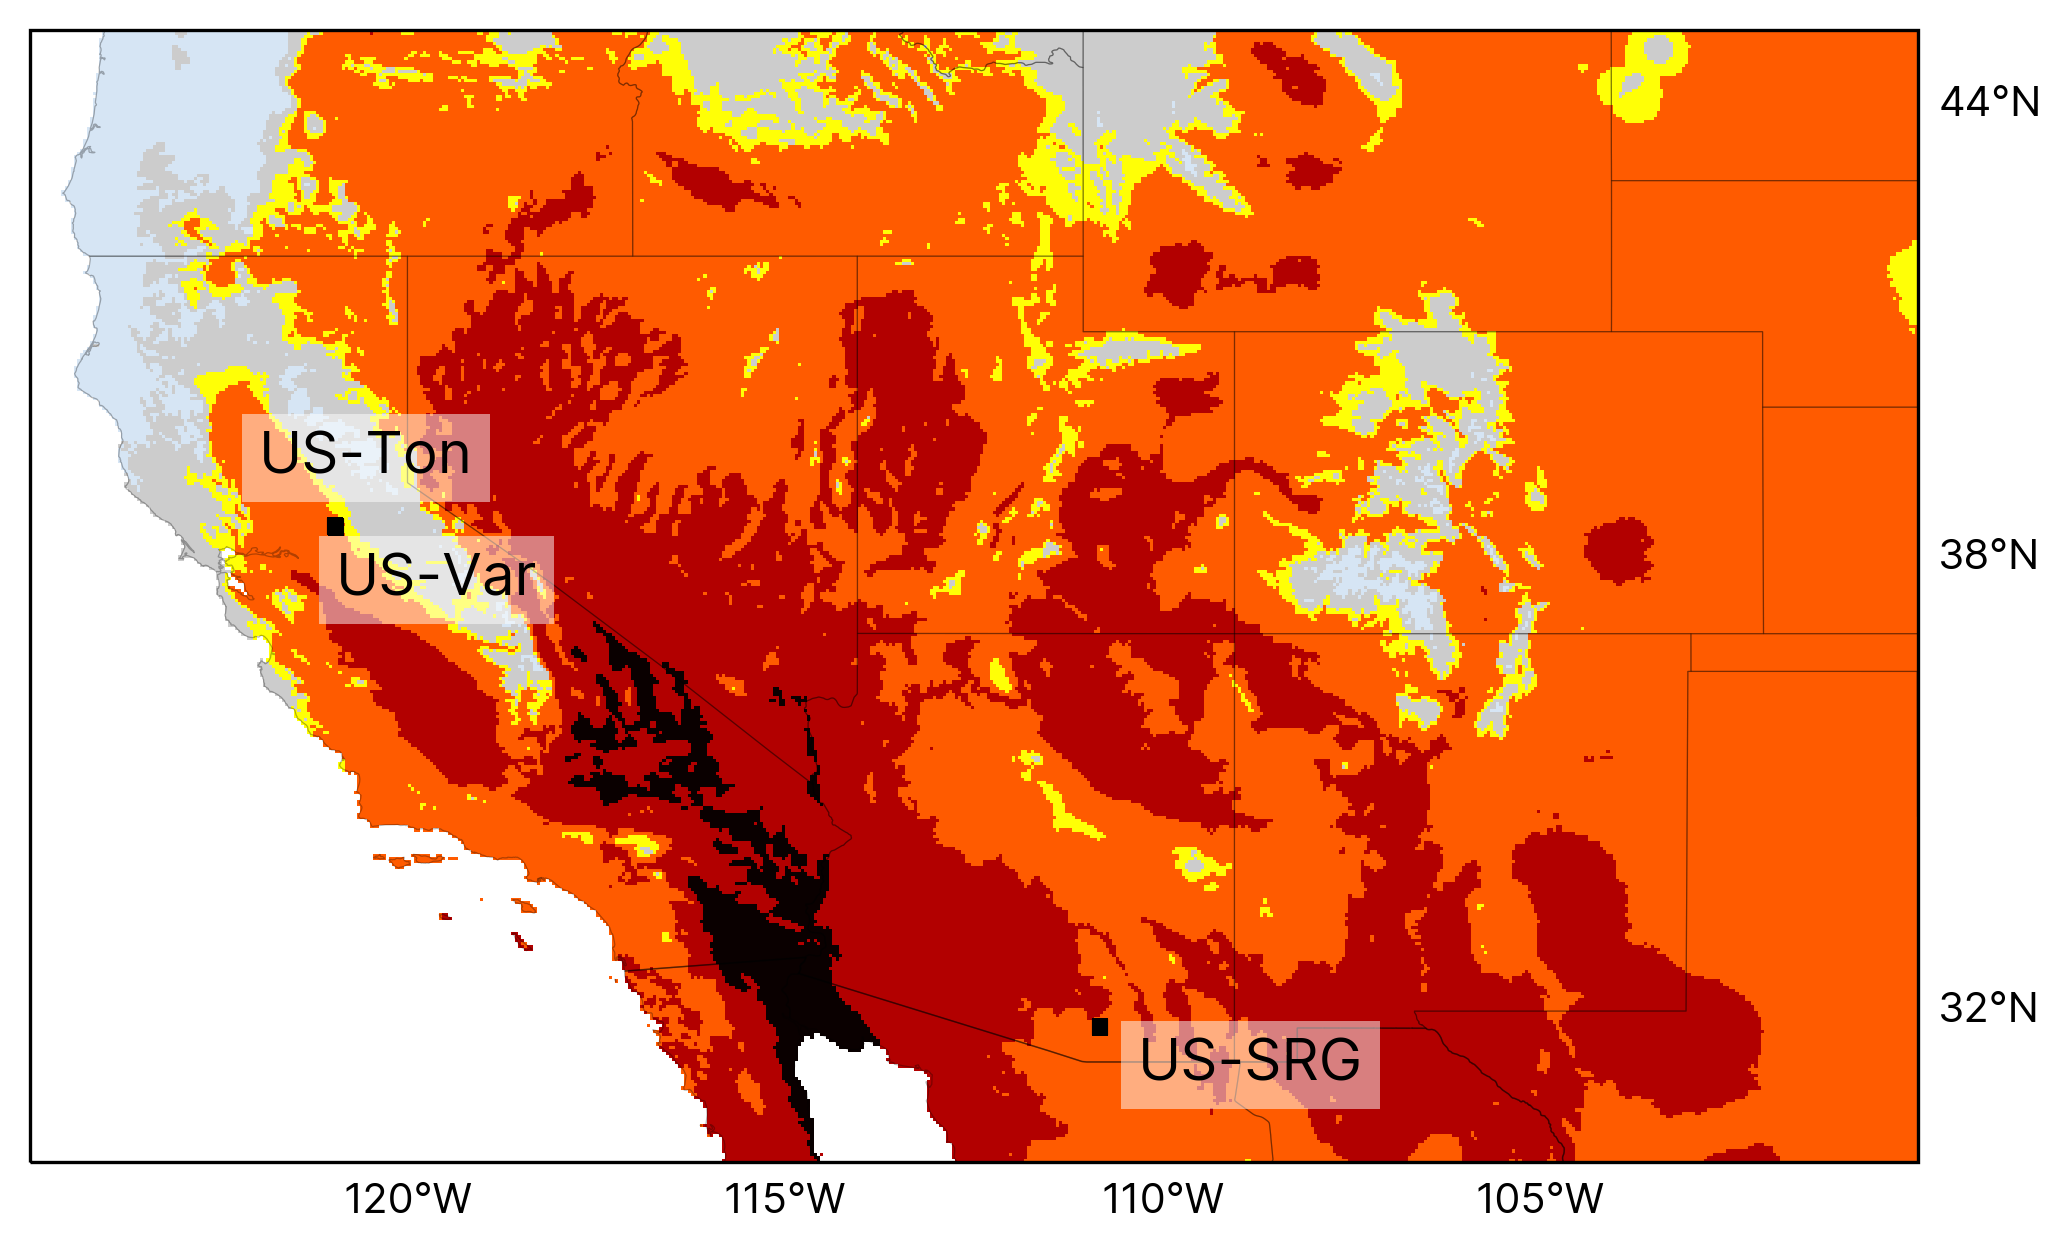

In [10]:
AI_terra = sio.loadmat(AI_DATA_PATH)['AI_terra']
AI_terra = AI_terra[45*24:60*24, 55*24:80*24]

hyper_arid = (AI_terra < 0.05)
hyper_arid_n = np.zeros(AI_terra.shape)
hyper_arid_n[hyper_arid] = 0.0
hyper_arid_n[hyper_arid==False] = np.nan

arid = ((AI_terra >= 0.05) & (AI_terra < 0.2))
arid_n = np.zeros(AI_terra.shape)
arid_n[arid] = 1.0
arid_n[arid==False] = np.nan

semi_arid = ((AI_terra >= 0.2) & (AI_terra < 0.5))
semi_arid_n = np.zeros(AI_terra.shape)
semi_arid_n[semi_arid] = 2.0
semi_arid_n[semi_arid==False] = np.nan

dry_sub_humid = ((AI_terra >= 0.5) & (AI_terra < 0.65))
dry_sub_humid_n = np.zeros(AI_terra.shape)
dry_sub_humid_n[dry_sub_humid] = 3.0
dry_sub_humid_n[dry_sub_humid==False] = np.nan

humid = (AI_terra >= 0.65) & (AI_terra < 1.2)
humid_n = np.zeros(AI_terra.shape)
humid_n[humid] = 4.0
humid_n[humid==False] = np.nan

wet = AI_terra >= 1.2
wet_n = np.zeros(AI_terra.shape)
wet_n[wet] = 5.0
wet_n[wet==False] = np.nan

plt.figure(figsize=(10,5), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.BORDERS, linewidth=0.4, alpha=0.3)
ax.add_feature(cf.STATES, linewidth=0.3, alpha=0.3)

extent=[-125, -100, 30, 45]

def get_marker(cluster):
    if cluster == "cDD":
        return "s"
    elif cluster == "cGR":
        return "^"
    elif cluster == "cLS":
        return "o"
    elif cluster == "cNA":
        return "D"

for (idx, (SITE_ID, lon, lat, cluster)) in df[["SITE_ID", "lon", "lat", "cluster"]].iterrows():
    box_america = ((lon > -125) & (lon < -100) & (lat > 30) & (lat< 45))
    if box_america:
        plt.plot(lon, lat,  markersize=3, marker=get_marker(cluster), color='black')
        if SITE_ID == "US-Var":
            t=plt.text(lon , lat - 0.9, SITE_ID, fontsize=14)
        elif SITE_ID == "US-Ton":
            t=plt.text(lon -1, lat + 0.7, SITE_ID, fontsize=14)
        elif SITE_ID == "US-SRG":
            t=plt.text(lon + 0.5, lat - 0.7, SITE_ID, fontsize=14)
        else:
            t=plt.text(lon - 0.5, lat + 0.7, SITE_ID, fontsize=14)
        t.set_bbox(dict(facecolor='white', alpha=0.5, linewidth=0))
plt.imshow(hyper_arid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(arid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(semi_arid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(dry_sub_humid_n, vmin=0, vmax=4, interpolation="none", cmap="hot", extent=extent)
plt.imshow(humid_n, cmap="gist_gray", interpolation="none", vmin=0, vmax=5, extent=extent)
plt.imshow(wet_n, cmap="Blues", interpolation="none", vmin=4, vmax=10, extent=extent)


gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='gray', alpha=0.5, linestyle="--")

gl.ylocator = mticker.FixedLocator([32, 38, 44])
gl.xlabels_top = False
gl.ylabels_left = False

